# Machine Learning using Python

## Unsupervised Learning

In [1]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load and review the dataset|

In [3]:
#reading the credit_card dataset
df=pd.read_csv("credit_card.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
pd.set_option('display.max_columns', 18)
pd.set_option('display.max_rows', 8950)

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Q1. What does the primary analysis of several categorical features reveal?

### There are no categorical features in the credit_card dataset

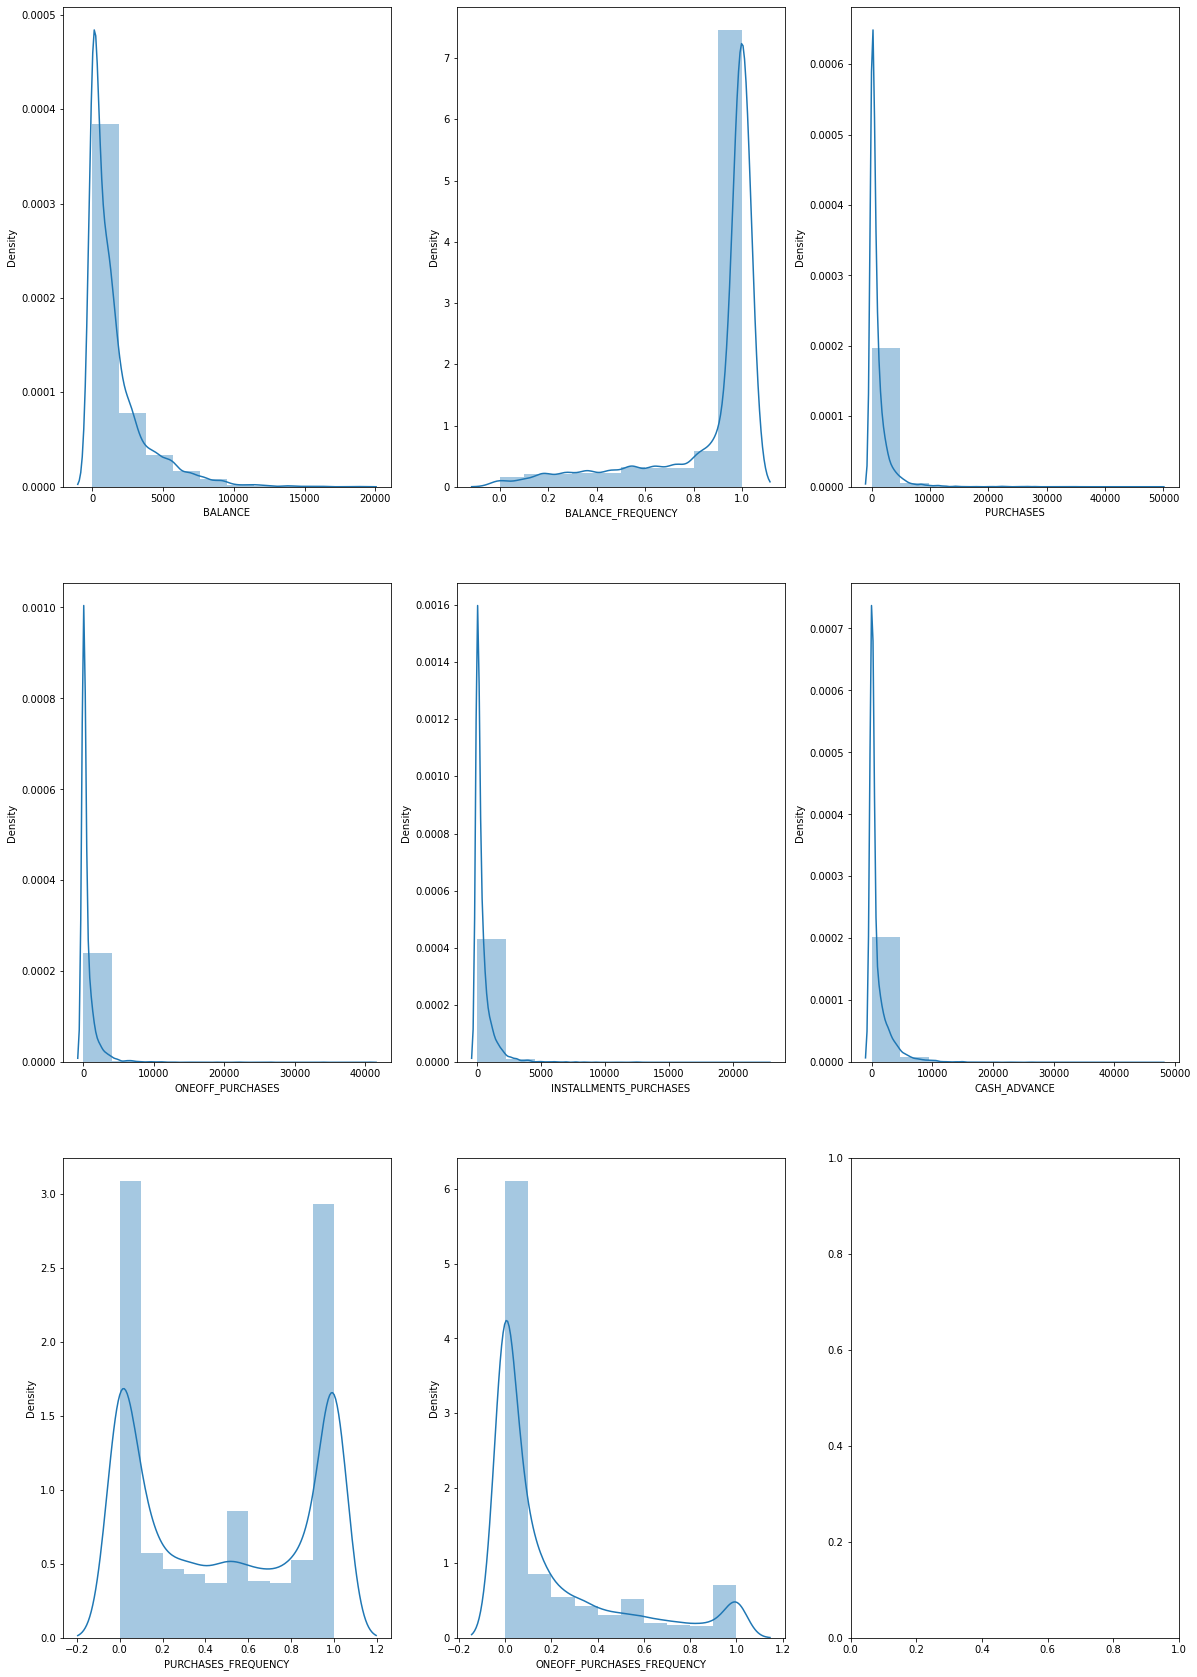

In [10]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(3,3, figsize=(20,30))
vis1 = sns.distplot(df["BALANCE"],bins=10, ax= ax[0,0])
vis2 = sns.distplot(df["BALANCE_FREQUENCY"],bins=10, ax=ax[0,1])
vis3 = sns.distplot(df["PURCHASES"],bins=10, ax= ax[0,2])
vis4 = sns.distplot(df["ONEOFF_PURCHASES"],bins=10, ax=ax[1,0])
vis5 = sns.distplot(df["INSTALLMENTS_PURCHASES"],bins=10, ax= ax[1,1])
vis6 = sns.distplot(df["CASH_ADVANCE"],bins=10, ax=ax[1,2])
vis7 = sns.distplot(df["PURCHASES_FREQUENCY"],bins=10, ax= ax[2,0])
vis8 = sns.distplot(df["ONEOFF_PURCHASES_FREQUENCY"],bins=10, ax=ax[2,1])
f.savefig('subplot.png')

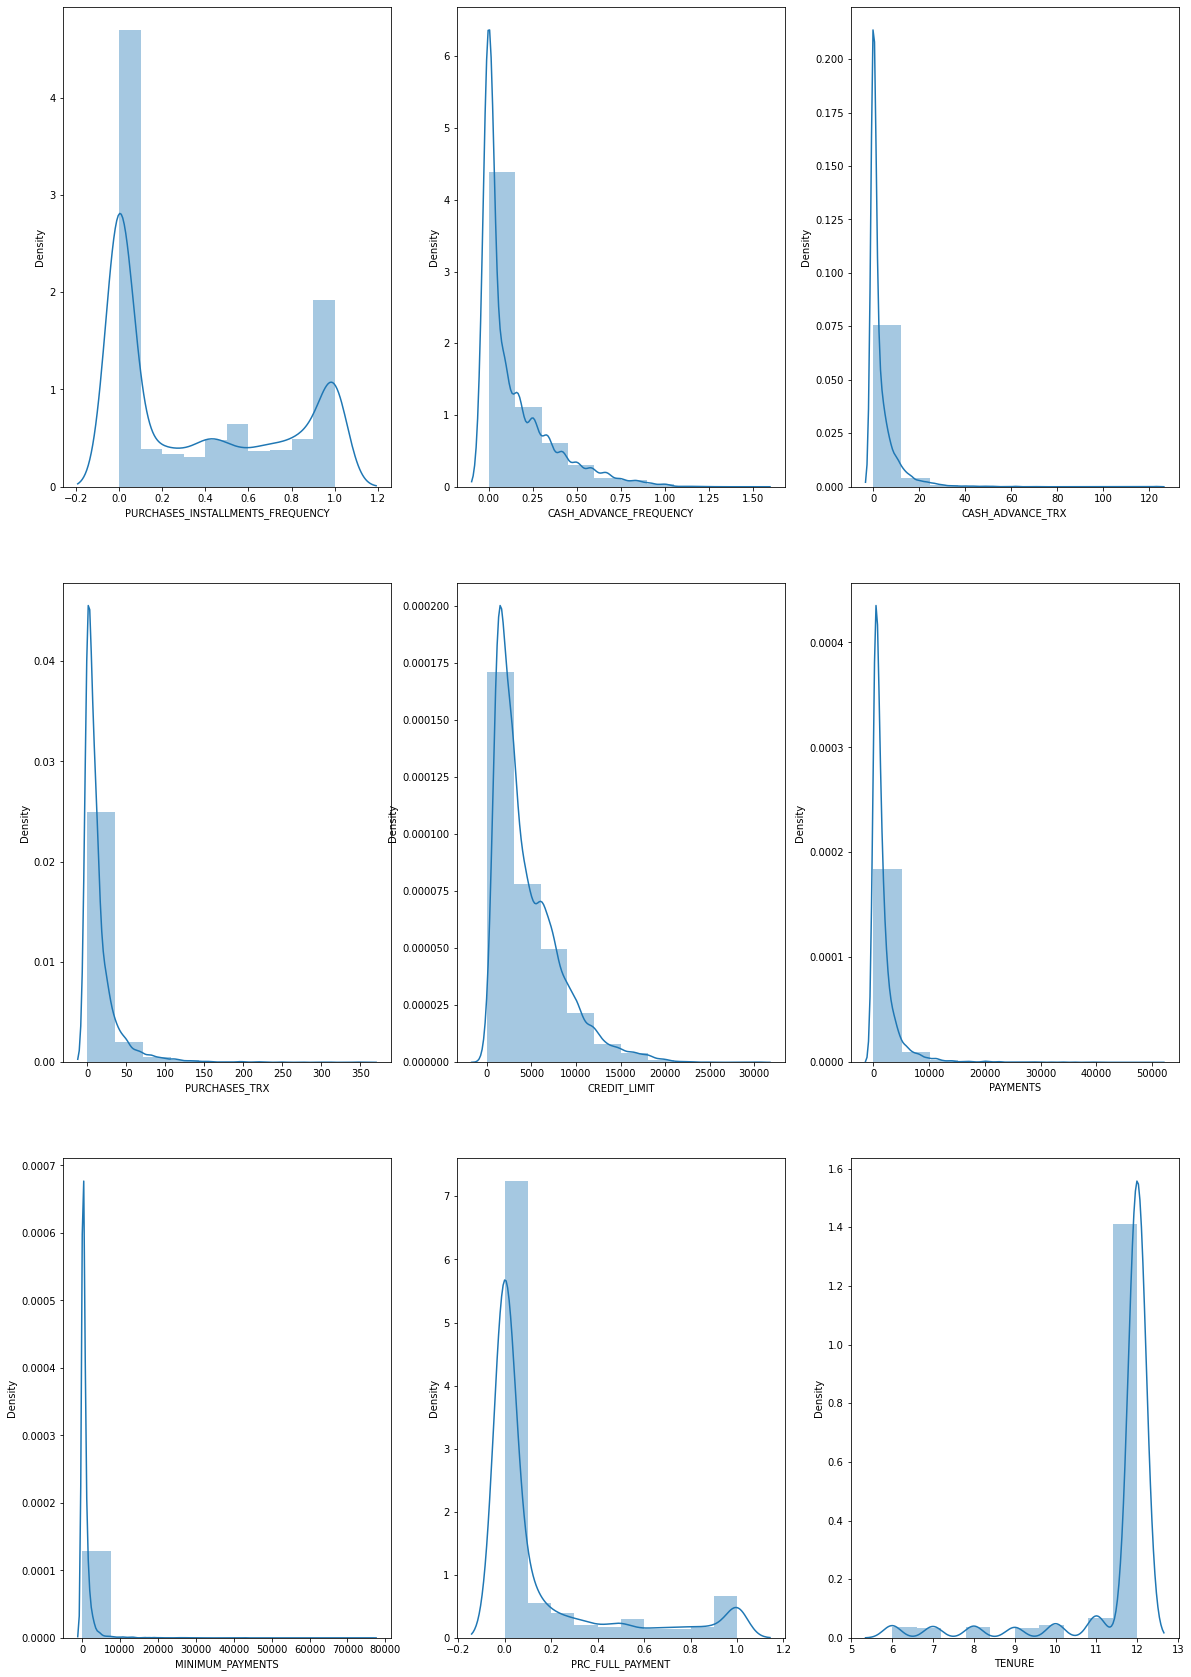

In [11]:
f, ax = plt.subplots(3,3, figsize=(20,30))
vis1 = sns.distplot(df["PURCHASES_INSTALLMENTS_FREQUENCY"],bins=10, ax= ax[0,0])
vis2 = sns.distplot(df["CASH_ADVANCE_FREQUENCY"],bins=10, ax=ax[0,1])
vis3 = sns.distplot(df["CASH_ADVANCE_TRX"],bins=10, ax= ax[0,2])
vis4 = sns.distplot(df["PURCHASES_TRX"],bins=10, ax=ax[1,0])
vis5 = sns.distplot(df["CREDIT_LIMIT"],bins=10, ax= ax[1,1])
vis6 = sns.distplot(df["PAYMENTS"],bins=10, ax=ax[1,2])
vis7 = sns.distplot(df["MINIMUM_PAYMENTS"],bins=10, ax= ax[2,0])
vis8 = sns.distplot(df["PRC_FULL_PAYMENT"],bins=10, ax=ax[2,1])
vis9 = sns.distplot(df["TENURE"],bins=10, ax=ax[2,2])
f.savefig('subplot.png')

# Q2. Perform the following Exploratory Data Analysis tasks:

## a. Missing Value Analysis

In [12]:
df.isnull().sum()
# Attributes CREDIT_LIMIT and MINIMUM_PAYMENTS has missing values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

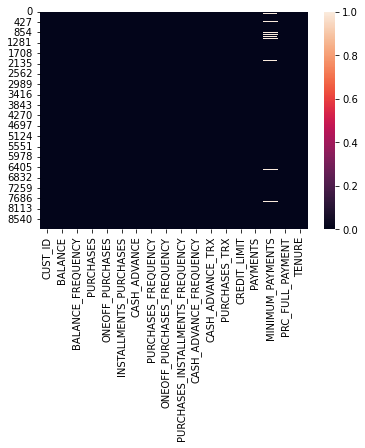

In [13]:
# Plotting the missing values
sns.heatmap(df.isnull())

In [14]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

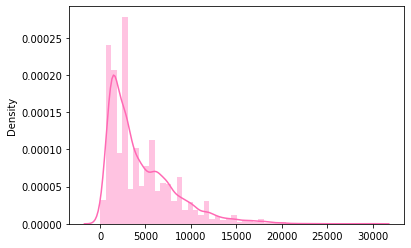

In [15]:
sns.distplot(x=df['CREDIT_LIMIT'],color='hotpink')

In [16]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

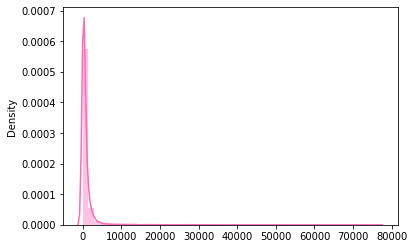

In [17]:
sns.distplot(x=df['MINIMUM_PAYMENTS'],color='hotpink')

### Replacing missing values with mean

In [18]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [19]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [20]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## b. Outlier Treatment using the Z-score method

BALANCE                                AxesSubplot(0.125,0.749828;0.168478x0.130172)
BALANCE_FREQUENCY                   AxesSubplot(0.327174,0.749828;0.168478x0.130172)
PURCHASES                           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
ONEOFF_PURCHASES                    AxesSubplot(0.731522,0.749828;0.168478x0.130172)
INSTALLMENTS_PURCHASES                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
CASH_ADVANCE                        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
PURCHASES_FREQUENCY                 AxesSubplot(0.529348,0.593621;0.168478x0.130172)
ONEOFF_PURCHASES_FREQUENCY          AxesSubplot(0.731522,0.593621;0.168478x0.130172)
PURCHASES_INSTALLMENTS_FREQUENCY       AxesSubplot(0.125,0.437414;0.168478x0.130172)
CASH_ADVANCE_FREQUENCY              AxesSubplot(0.327174,0.437414;0.168478x0.130172)
CASH_ADVANCE_TRX                    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
PURCHASES_TRX                       AxesSubplot(0.731522,0.437414

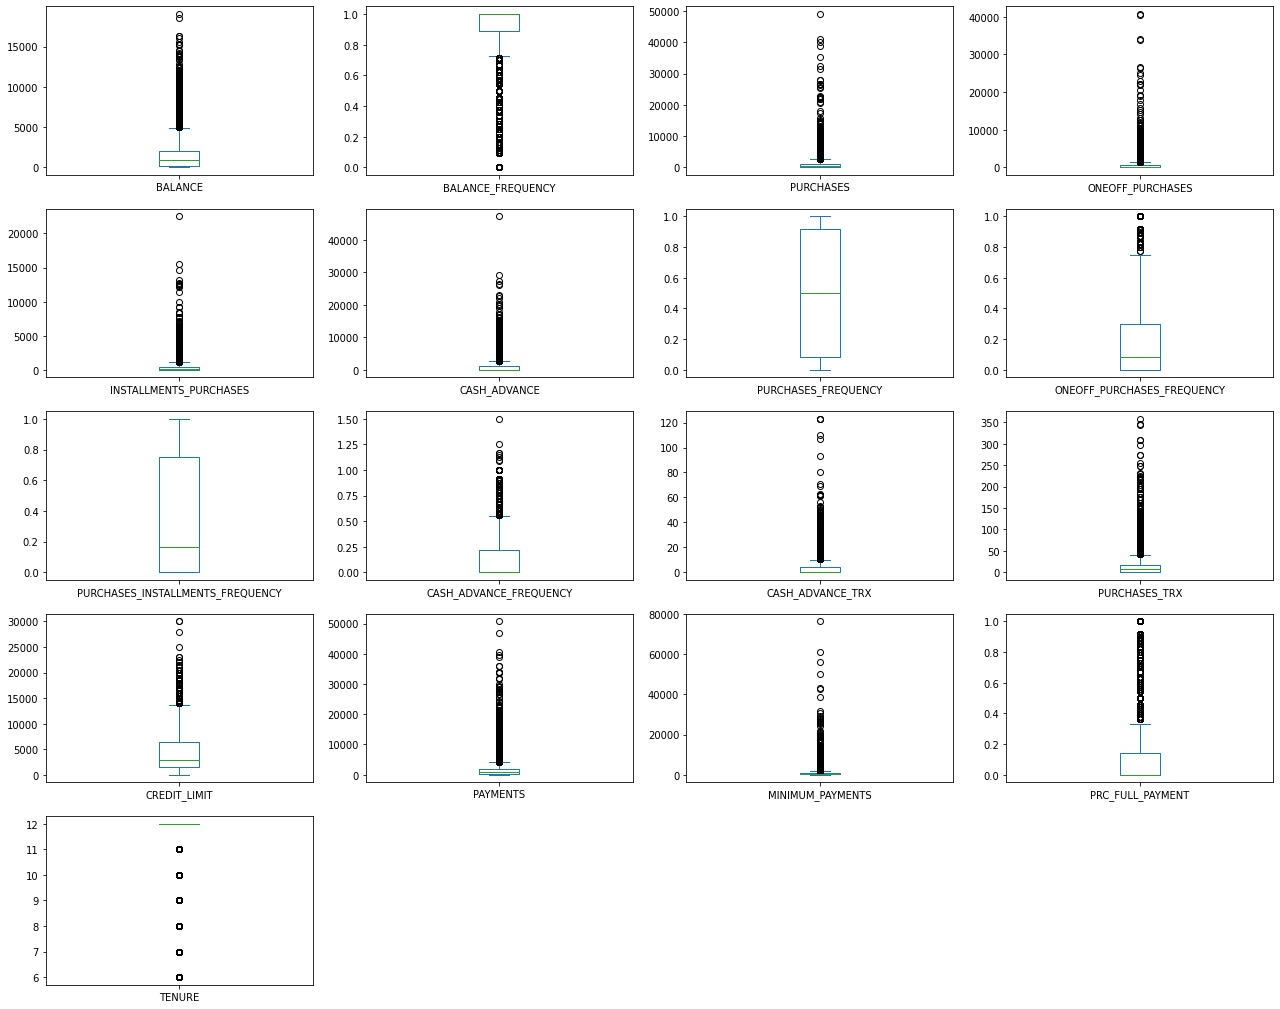

In [21]:
# Plotting the outliers
df.plot(subplots=True,layout=(5,4),kind='box',figsize=(22,18))

In [22]:
# To Apply Zscore Treatment
from scipy.stats import zscore

In [53]:
z = np.abs(zscore(df['PURCHASES']))

In [54]:
df['Zscore'] = z
len(df[df['Zscore']>2])

256

In [55]:
df_z = df[df['Zscore']<3] 

In [56]:
print('shape of the new dataset',df_z.shape  )

shape of the new dataset (8815, 16)


## c. Deal with correlated variables


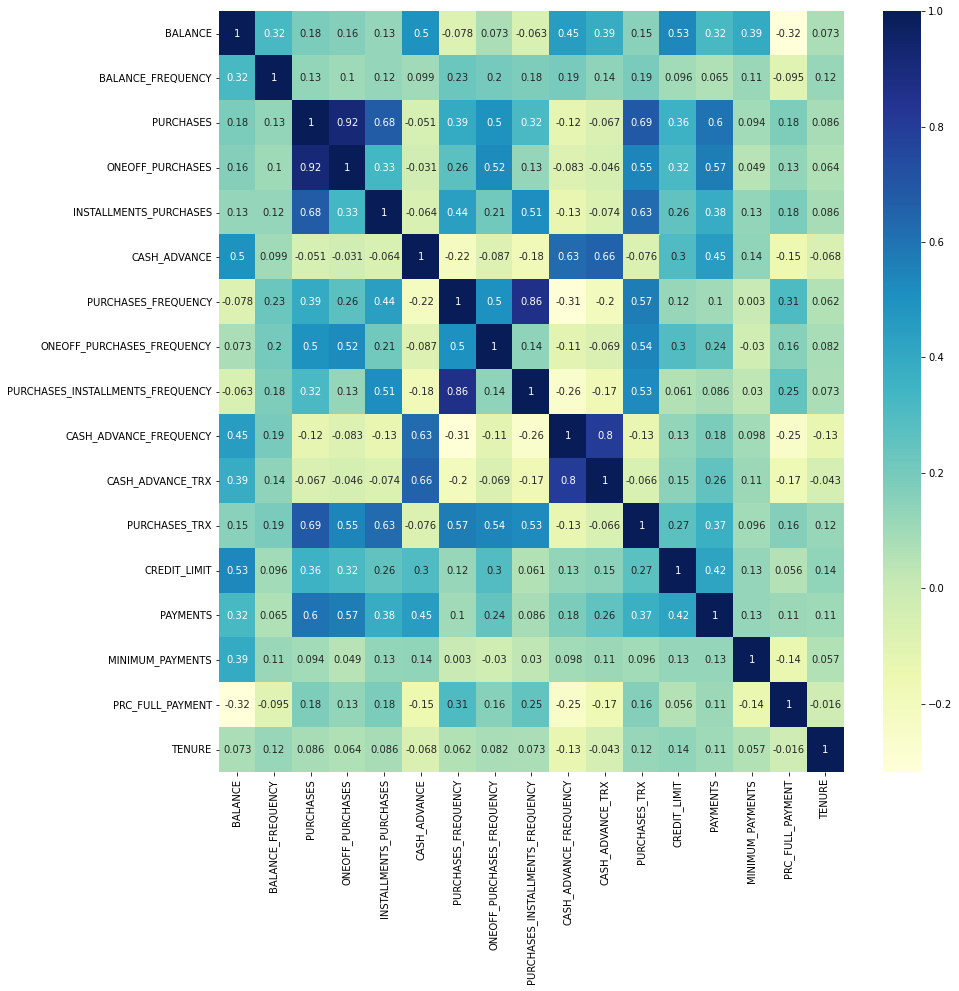

In [23]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [24]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [25]:
high_corr_var

[('PURCHASES', 'ONEOFF_PURCHASES'),
 ('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY')]

In [37]:
# Dropping the columns with maximum correlation
df=df.drop(['ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1)

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained


In [26]:
df=df.drop('CUST_ID',axis=1)

In [57]:
X=df.values

In [58]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [60]:
from sklearn.decomposition import PCA
Pca_12=PCA(n_components=12,random_state=0)
Pca_12.fit(X_scaled)
Pca_12_x=Pca_12.transform(X_scaled)

In [61]:
print("variance by all the components=",sum(Pca_12.explained_variance_ratio_*100))

variance by all the components= 95.98225059582177


In [62]:
from sklearn.decomposition import PCA
Pca_12=PCA(n_components=12,random_state=0)
Pca_12.fit(X_scaled)
Pca_12_x=Pca_12.transform(X_scaled)
print("variance by all the components=",sum(Pca_12.explained_variance_ratio_*100))

variance by all the components= 95.98225059582177


### While performing dimensionality reduction with number of components as 12, we are getting nearly 95% of variance

In [63]:
Pca_12.explained_variance_ratio_*107

array([29.20316007, 22.31468945,  9.12768832,  8.12716   ,  6.77317154,
        5.94671951,  5.56882419,  4.44403346,  4.07085542,  3.31864208,
        2.02955687,  1.77650721])

Text(0, 0.5, 'Explained_variance')

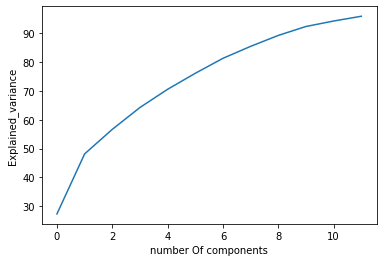

In [64]:
plt.plot(np.cumsum(Pca_12.explained_variance_ratio_*100))
plt.xlabel("number Of components")
plt.ylabel('Explained_variance')

# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [65]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(df)
df1=scale.transform(df)
df_scaled=pd.DataFrame(df)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Zscore
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.424900
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.469552
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.107668
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0.232058
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.462063


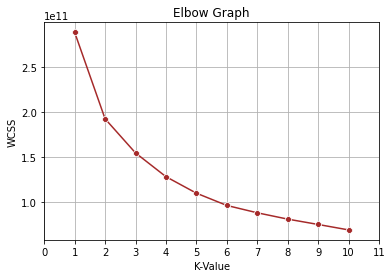

In [66]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="brown", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

### The optimum value of k can be considered as 2

# Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df_scaled)
          score=silhouette_score(df_scaled,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.5122770588507533)
(for n_clusters=3,silhouette_score  is 0.46834237774385)
(for n_clusters=4,silhouette_score  is 0.4600549242756446)
(for n_clusters=5,silhouette_score  is 0.38563288371061677)
(for n_clusters=6,silhouette_score  is 0.3810813618767468)
(for n_clusters=7,silhouette_score  is 0.3920731540912734)
(for n_clusters=8,silhouette_score  is 0.38906331020531315)


### The optimum value of k can be considered as 2